In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, ConfusionMatrixDisplay

In [630]:
df = pd.read_csv('youth_data.csv')

In [632]:
df.head(10)

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,...,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4
0,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,2,2,1,2,2
1,991,60,91.0,91,91.0,2.0,991,991,991,14,...,1,6,0,1,1,2,2,1,2,2
2,1,991,91.0,91,93.0,91.0,991,991,11,991,...,1,2,1,1,1,4,2,3,1,1
3,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,2,0,1,1,3,2,2,1,1
4,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,5,0,1,1,4,2,3,2,2
5,991,991,91.0,91,91.0,91.0,991,991,991,991,...,2,99,99,2,1,3,2,3,1,1
6,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,6,5,1,1,3,1,3,2,2
7,993,991,91.0,91,93.0,91.0,991,991,12,991,...,1,4,10,1,2,2,1,1,1,1
8,991,991,91.0,91,91.0,91.0,991,991,991,991,...,2,99,99,1,2,3,2,2,1,1
9,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,6,0,1,1,4,2,3,1,1


In [634]:
# Print columns to identify those pertaining to parental influence for our feature matrix
df.columns 

Index(['IRALCFY', 'IRMJFY', 'IRCIGFM', 'IRSMKLSS30N', 'IRALCFM', 'IRMJFM',
       'IRCIGAGE', 'IRSMKLSSTRY', 'IRALCAGE', 'IRMJAGE', 'MRJFLAG', 'ALCFLAG',
       'TOBFLAG', 'ALCYDAYS', 'MRJYDAYS', 'ALCMDAYS', 'MRJMDAYS', 'CIGMDAYS',
       'SMKLSMDAYS', 'SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ',
       'STNDALC', 'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2',
       'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2',
       'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2',
       'PRMJMO', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2',
       'FRDPCIG2', 'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2',
       'DRPRVME3', 'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND',
       'IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM',
       'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10',

In [636]:
# Check for NaNs in each column
nans = df.isna().sum()
nans[nans > 0]

TCHGJOB      43
AVGGRADE    716
STNDSCIG    377
STNDSMJ     445
STNDALC     454
STNDDNK     550
PARCHKHW     77
PARHLPHW     89
PRCHORE2     35
PRLMTTV2     68
PARLMTSN    259
PRGDJOB2     63
PRPROUD2     77
ARGUPAR     180
YOFIGHT2     67
YOGRPFT2     64
YOHGUN2      46
YOSELL2      25
YOSTOLE2     40
YOATTAK2     41
PRPKCIG2     96
PRMJEVR2    101
PRMJMO      100
PRALDLY2     91
YFLPKCG2     90
YFLTMRJ2     89
YFLMJMO      92
YFLADLY2     93
FRDPCIG2    146
FRDMEVR2    152
FRDMJMON    152
FRDADLY2    147
TALKPROB    336
PRTALK3     199
PRBSOLV2    286
PREVIOL2    142
PRVDRGO2    102
GRPCNSL2    120
PREGPGM2     98
YTHACT2      68
DRPRVME3    193
ANYEDUC3    167
RLGATTD     288
RLGIMPT     321
RLGDCSN     297
RLGFRND     322
HEALTH2      13
dtype: int64

In [638]:
df_cleaned = df.dropna() # drop NaNs

In [640]:
df_cleaned.shape, df.shape # lost about 20% of our data due to NaNs. 

((8249, 79), (10561, 79))

In [642]:
# Define target variables
marj_used = df_cleaned['MRJFLAG'].copy() # Whether a youth used marijuana or not
marj_used_days = df_cleaned['MRJYDAYS'].copy() # How many days a youth used marijuana in the past year

In [644]:
# Check to see the proportions of the target variable after dropping the NaNs.
# If they are similar, keeping the NaNs dropped is okay. 
df['MRJFLAG'].value_counts(normalize=True), marj_used.value_counts(normalize=True)

(MRJFLAG
 0    0.849446
 1    0.150554
 Name: proportion, dtype: float64,
 MRJFLAG
 0    0.837677
 1    0.162323
 Name: proportion, dtype: float64)

Because the proportions are similar, i.e., 85/15 vs 84/16, after dropping the NaNs, we can continue to define our features.

In [646]:
# Define our parental feature matrix
parental_influence = df_cleaned[['ARGUPAR', 'PRPROUD2', 'PRGDJOB2', 'PARLMTSN', 'PRLMTTV2', 'PRCHORE2', 'PARHLPHW', 'PARCHKHW', 'PRTALK3', 'POVERTY3', 'IMOTHER', 'IFATHER', 'INCOME']].copy()

In [648]:
# A preliminary check to determine that none of the predictors are highly correlated with using marijuana.
df_temp = pd.concat([parental_influence, marj_used], axis=1)
correlations = df_temp.corr()['MRJFLAG'].drop('MRJFLAG')
print(correlations.sort_values(ascending=False))

PRPROUD2    0.152415
PRLMTTV2    0.147784
PRGDJOB2    0.145324
PARHLPHW    0.137288
ARGUPAR     0.118352
PARCHKHW    0.116431
IFATHER     0.077318
IMOTHER     0.075043
PRCHORE2    0.033093
PARLMTSN    0.000454
POVERTY3   -0.010453
PRTALK3    -0.018708
INCOME     -0.031194
Name: MRJFLAG, dtype: float64


In [650]:
# A preliminary check to determine that none of the predictors are highly correlated with daily use of marijuana.
df_temp = pd.concat([parental_influence, marj_used_days], axis=1)
correlations = df_temp.corr()['MRJYDAYS'].drop('MRJYDAYS')
print(correlations.sort_values(ascending=False))

PRTALK3     0.019831
INCOME      0.003092
PARLMTSN   -0.006545
POVERTY3   -0.011945
PRCHORE2   -0.022093
IMOTHER    -0.044767
IFATHER    -0.050944
ARGUPAR    -0.093869
PARCHKHW   -0.096887
PARHLPHW   -0.106204
PRLMTTV2   -0.119584
PRGDJOB2   -0.123844
PRPROUD2   -0.124676
Name: MRJYDAYS, dtype: float64


Since the correlations from the feature matrix are not significant in predicting either target variable, we can proceed to fitting the models.

### Fit a Decision Tree Classifier

Goal: Find the factors that best determine whether or not a youth has used marijuana or not.

In [652]:
marj_used.value_counts() # 0 is assigned to 'not used' and 1 is 'used'

MRJFLAG
0    6910
1    1339
Name: count, dtype: int64

In [654]:
# Stratify to ensure that the split is proportional to the target variable
X_train, X_test, y_train, y_test = train_test_split(parental_influence, marj_used, 
                                                    test_size = 0.2, random_state = 1337, 
                                                    stratify = marj_used)

# Fit the classifier
tree_mrj = DecisionTreeClassifier(random_state = 1337)
tree_mrj.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_mrj.predict(X_test)

# Evaluate the classifier
accuracy = tree_mrj.score(X_test, y_test) * 100
matrix = confusion_matrix(y_test, y_pred)

print(accuracy)

80.0


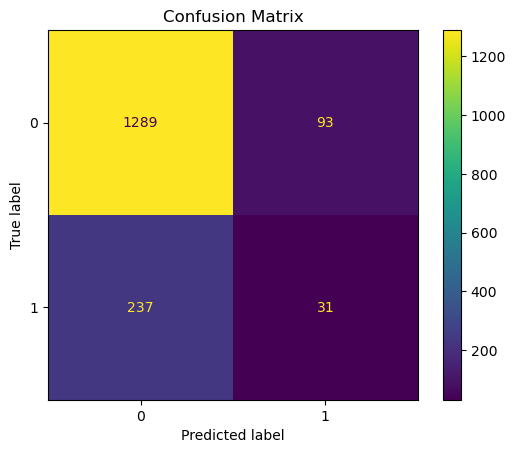

In [656]:
display = ConfusionMatrixDisplay(matrix)
display.plot()
plt.title('Confusion Matrix')
plt.show()

The model has an accuracy score of 0.800 meaning that it correctly classified 80% of the test data. 
The confusion matrix further indicates that it struggles to classify the true positives, i.e., it cannot accurately predict when a youth will actually used marijuana.

In [659]:
feat_importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': tree_mrj.feature_importances_})
feat_importances.sort_values('importance', ascending=False)

,feature_name,importance
12,INCOME,0.170509
9,POVERTY3,0.099565
3,PARLMTSN,0.086377
8,PRTALK3,0.086194
7,PARCHKHW,0.077101
6,PARHLPHW,0.070754
5,PRCHORE2,0.068589
2,PRGDJOB2,0.064646
11,IFATHER,0.063237
10,IMOTHER,0.059052


Interestingly, INCOME plays the most importance when classifying a youth as either having used marijuana or not.

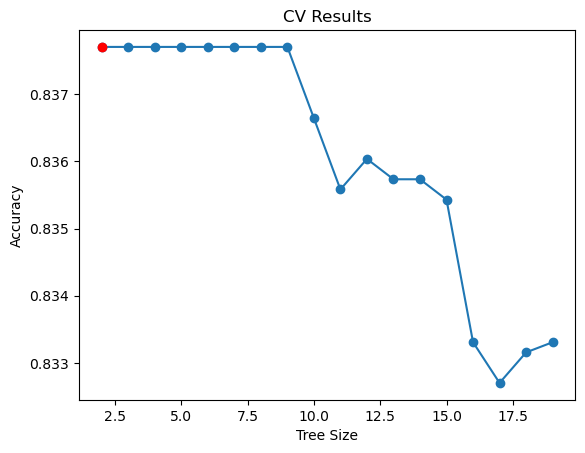

In [626]:
params = {
    'max_leaf_nodes': range(2, 20)
}
tree_mrj_search = GridSearchCV(tree_mrj, params, cv=10)
tree_mrj_search.fit(X_train, y_train)
tree_mrj_search_res = tree_mrj_search.cv_results_

best_size = tree_mrj_search.best_params_['max_leaf_nodes']
best_score = tree_mrj_search.best_score_

plt.figure()
plt.plot(tree_mrj_search_res["param_max_leaf_nodes"], tree_mrj_search_res["mean_test_score"], 'o-')
plt.plot(best_size, best_score, 'ro-')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('CV Results');

The plot indicates that having the maximum number of leaf nodes being from 2 to 9 gives the best accuracy score.

In [665]:
# Create a mapping to rename the original columns to more descriptive ones
column_map = {
    'PRPROUD2': 'Praents Tell Child They Are Proud Of Things Done',
    'PRLMTTV2': 'Parents Limit Amount of TV',
    'IMOTHER': 'Mother is Present in Home', 
    'PRTALK3': 'Talked With Parent About Danger of Drugs',
    'IFATHER': 'Father is Present in Home',
    'PARHLPHW': 'Parents Help With Homework In Past Year',
    'ARGUPAR': 'Times Argued With One Parent In Past Year',
    'PRGDJOB2': 'Parents Say They Had Done Good Job In Past Year'
}

# Rename columns 
X_train_named_columns = X_train.rename(columns=column_map)

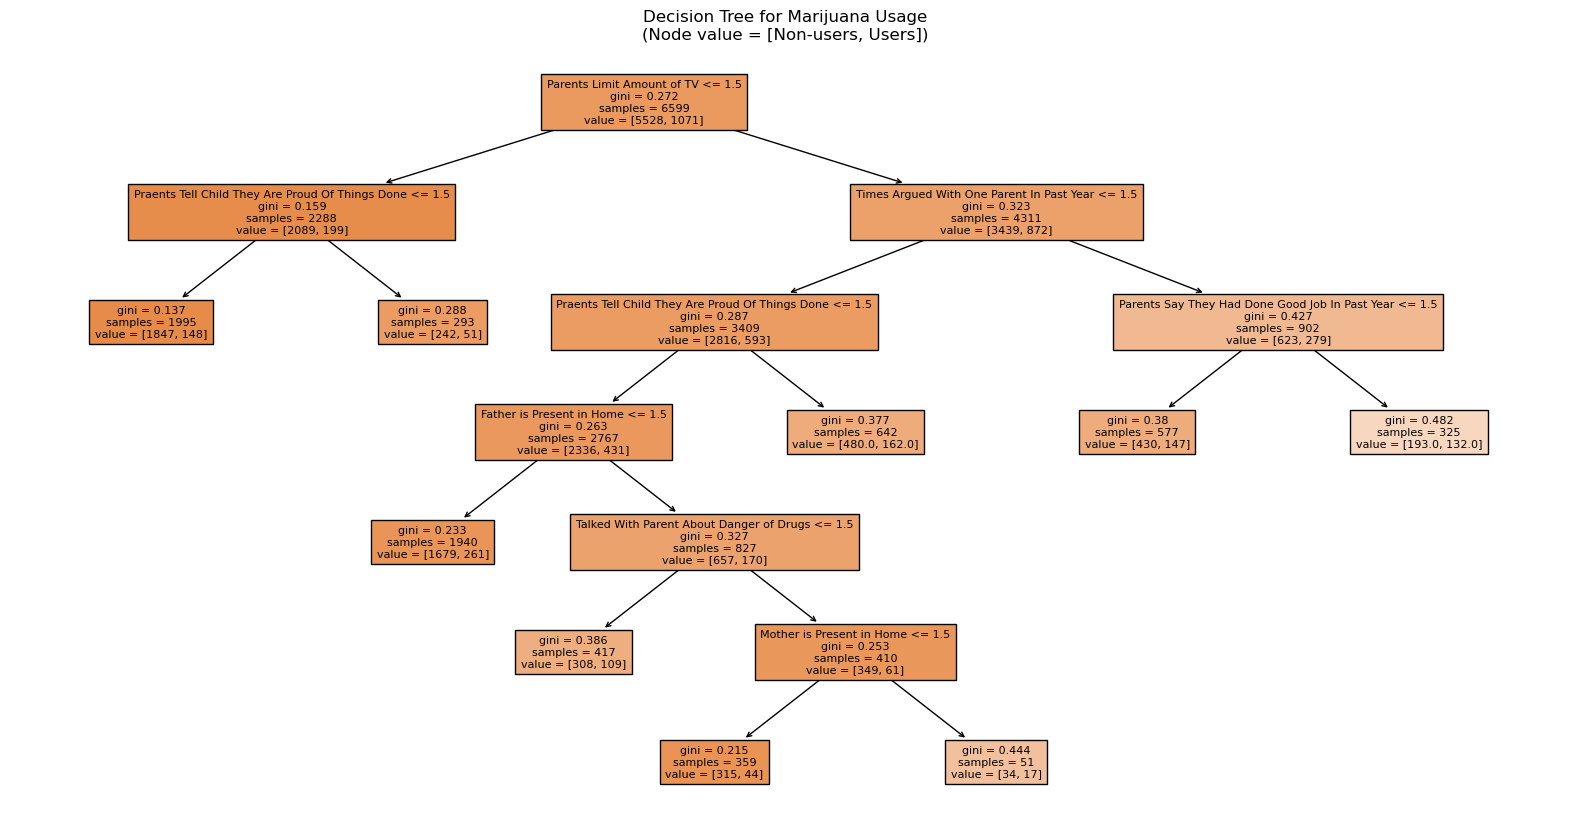

In [667]:
# Prune tree using tree size of 9 for interpretability
tree_mrj_pruned = DecisionTreeClassifier(max_leaf_nodes = 9, random_state = 1337)
tree_mrj_pruned.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(
    tree_mrj_pruned,  
    feature_names=X_train_named_columns.columns, 
    filled=True,
    fontsize=8
)
plt.title("Decision Tree for Marijuana Usage\n(Node value = [Non-users, Users])")
plt.show()

Discussion: When the parents DON'T limit the amount of TV, you get 872 youth using marijuana still. Then when there are fewer than 9 times a youth has argued with a parent, 593 youth have used marijuana. Further down this line, when a father is not in the home or it is unknown that the father is in the home, there are 170 youth who have used marijuana. From this, if a parent has talked about the dangers of using tobacco, alcohol, or drugs, there are 109 youth who have been classified of using marijuana.

### Fit a Gradient Boosting Classifier

Goal: Compare a regular decision tree against a boosting model to see how the tree differs after optimization.

In [689]:
# Set up the parameter grid for searching
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Fit and search for the best model
boost_mrj = GradientBoostingClassifier(random_state = 1337)
grid_search = GridSearchCV(boost_mrj, params, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}


In [672]:
# Train the model on the best parameters
best_model_boost_mrj = grid_search.best_estimator_
y_pred = best_model_boost_mrj.predict(X_test)

In [674]:
# Evaluate the classifier
accuracy = best_model_boost_mrj.score(X_test, y_test) * 100
matrix = confusion_matrix(y_test, y_pred)

print(accuracy)

83.75757575757575


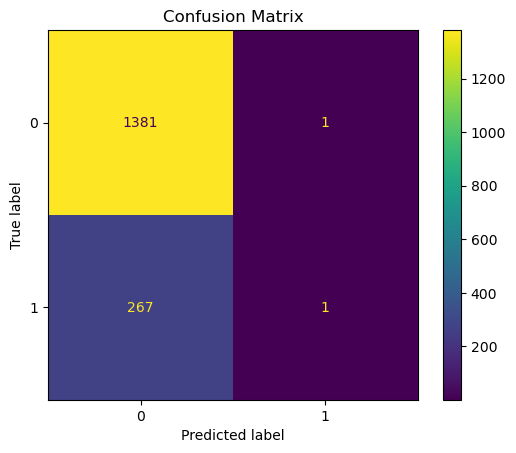

In [676]:
display = ConfusionMatrixDisplay(confusion_matrix=matrix)
display.plot()
plt.title('Confusion Matrix')
plt.show()

In [680]:
train_accuracy = best_model_boost_mrj.score(X_train, y_train) * 100
train_accuracy

83.87634490074254

When comparing a single decision tree to a boosting model on the same features and target, the accuracy score does indeed go up for the boosting model but the accuracy of predicting whether or not a youth has used marijuana has dropped precipitously. This made me consider that it is overfitting but when comparing the accuracy scores between the train and test sets, they are basically the same. So I do not consider overfitting now.

# Fit a Random Forest Regressor

Goal: To predict how many days in a year a youth will smoke marijuana based on parental influence features.

In [692]:
# Create a map decoder to add continuous numbers back to the encoded values

# The key is the encoded value and the value is the decoded value
range_mapping = {
    1: (1, 11),     # 1-11 days
    2: (12, 49),    # 12-49 days
    3: (50, 99),    # 50-99 days
    4: (100, 299),  # 100-299 days
    5: (300, 365),  # 300-365 days
    6: (0, 0)       # Non-user: set to 0
}

# Based on the key, return a random number between the range in the mapping
def random_value_from_code(code):
    lower, upper = range_mapping.get(code, (0, 0)) 
    if code == 6:
        return 0

    return np.random.randint(lower, upper + 1) # add 1 to include the upper limit


# Apply the function to each data point
marj_used_days_decoded = marj_used_days.apply(random_value_from_code)

In [693]:
# Check result
marj_used_days.head(), marj_used_days_decoded.head()

(0    6
 1    3
 2    6
 4    6
 5    6
 Name: MRJYDAYS, dtype: int64,
 0     0
 1    82
 2     0
 4     0
 5     0
 Name: MRJYDAYS, dtype: int64)

In [694]:
# Prepare the data (note: cannot stratify when there are values with only one count)
X_train, X_test, y_train, y_test = train_test_split(parental_influence, 
                                                    marj_used_days_decoded,
                                                    test_size = 0.2, random_state = 1337)

In [536]:
# Define parameter grid
params_rf = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [3, 5, 7],
    'max_features': [3, 6, 9]
}

# Define and fit a random forest regressor
rf_mrj = RandomForestRegressor(random_state = 1337)
grid_search_rf = GridSearchCV(rf_mrj, params_rf, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters Found:", grid_search_rf.best_params_)

Best Parameters Found: {'max_depth': 5, 'max_features': 9, 'n_estimators': 1000}
Best Cross-Validation Score: -2884.2474132519105


In [537]:
best_rf = grid_search_rf.best_estimator_

y_pred_rf_train = best_rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred_rf_train)
print("Training Mean Squared Error:", mse)

y_pred_rf_test = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf_test)
print("Test Mean Squared Error:", mse)

Training Mean Squared Error: 2750.4800274367026
Test Mean Squared Error: 2160.976761439248


Interestingly, the training MSE is much higher than the test MSE. Further exploration into the dataset would be required to determine why this is occurring. This could be due to distribution issues in the train and test splits.

### Fit a Bagging Model Regressor

Goal: Compare against the Random Forest Regressor on performance.

In [538]:
# Compare against a bagging model

# Set the parameters 
params_bag = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [3, 5, 7],
    'max_features': [X_train.shape[1]]
}

# Define and fit a bagging model
bag_mrj = RandomForestRegressor(random_state = 1337)
grid_search_bag = GridSearchCV(bag_mrj, params_bag, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search_bag.fit(X_train, y_train)

print("Best Parameters Found:", grid_search_bag.best_params_)

Best Parameters Found: {'max_depth': 5, 'max_features': 13, 'n_estimators': 1000}
Best Cross-Validation Score: -2886.850642122554


In [539]:
best_bag = grid_search_bag.best_estimator_

y_pred_bag_train = best_bag.predict(X_train)
mse = mean_squared_error(y_train, y_pred_bag_train)
print("Training Mean Squared Error:", mse)

y_pred_bag_test = best_bag.predict(X_test)
mse = mean_squared_error(y_test, y_pred_bag_test)
print("Test Mean Squared Error:", mse)

Training Mean Squared Error: 2737.894542449486
Test Mean Squared Error: 2175.4346940201935


Interestingly, once again, the training MSE is much higher than the test MSE. Further exploration is therefore needed.

### Fit a Random Forest Classifier 

Goal: Determine if keeping the encoded values for the amount of days in a year using marijuana performs better.

In [708]:
X_train, X_test, y_train, y_test = train_test_split(parental_influence, 
                                                    marj_used_days,
                                                    test_size = 0.2, random_state = 1337,
                                                    stratify = marj_used_days)

In [710]:
params_rf = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [3, 5, 7],
    'max_features': [3, 6, 9]
}

# Define and fit a random forest classifier
rf_mrj_clf = RandomForestClassifier(random_state = 1337)
grid_search_rf_clf = GridSearchCV(rf_mrj_clf, params_rf, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid_search_rf_clf.fit(X_train, y_train)

print("Best Parameters Found:", grid_search_rf_clf.best_params_)

Best Parameters Found: {'max_depth': 3, 'max_features': 3, 'n_estimators': 500}


In [711]:
# Train the model on the best parameters
best_model_rf_clf = grid_search_rf_clf.best_estimator_

In [712]:
# Evaluate the classifier
accuracy_train = best_model_rf_clf.score(X_train, y_train) * 100
accuracy_test = best_model_rf_clf.score(X_test, y_test) * 100

print(accuracy_train)
print(accuracy_test)

86.3312623124716
86.3030303030303
